In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#loading dataset into python environment
df=pd.read_csv(r'C:\Users\rakes\Downloads\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.shape

(8124, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# display number of samples on each class
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
# distribution

num_fea = df.select_dtypes(exclude='object')
num_fea.hist(figsize=(20,15))
plt.suptitle('Distribution of Features', color='red', fontsize=20)
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

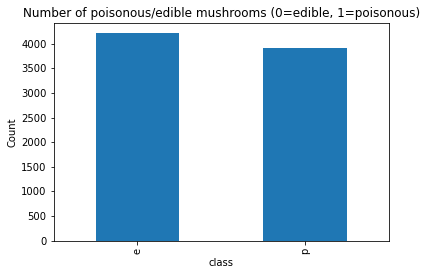

In [14]:
#check whether the dataset is balanced or not
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

In [ ]:
The dataset is balanced

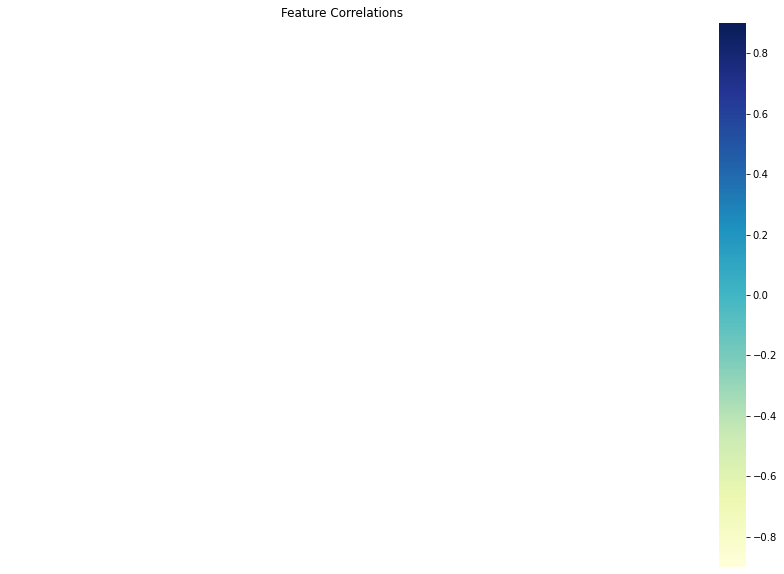

In [19]:
#correlation
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), vmin=-0.9, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.title('Feature Correlations')
plt.show()

Data manipulation
The data is categorical so we’ll use LabelEncoder to convert it to ordinal.

In [20]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [21]:
# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [22]:
df = df.drop(["veil-type"],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
# "class" column as numpy array.
y = df["class"].values
# All data except "class" column.
x = df.drop(["class"], axis=1).values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
# Classification Methods

In [24]:
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 94.65%


In [25]:
#2.KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [26]:
#3.SVM Classifier
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [27]:
#4.Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.18%


In [28]:
#5.Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [29]:
#6.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


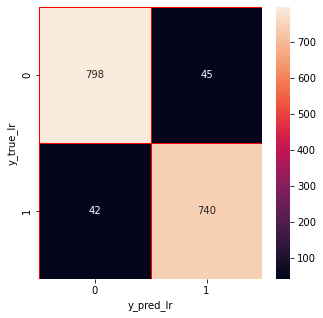

In [30]:
#Checking Classification Results with Confusion Matrix
from sklearn.metrics import confusion_matrix
# Logistic Regression
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

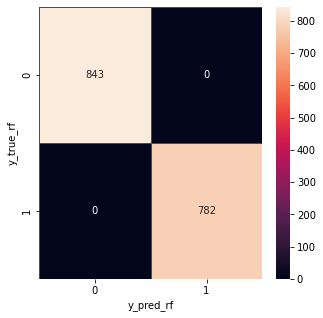

In [31]:
# Random Forest
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

From the confusion matrix, we saw that our train and test data is balanced.

Most of classfication methods hit 100% accuracy with this dataset.